In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [4]:
X_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (10000, 1))

(<matplotlib.image.AxesImage at 0x7f9db1bc42d0>, array([6], dtype=uint8))

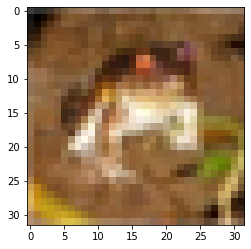

In [5]:
plt.imshow(X_train[0]),y_train[0]

In [6]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)
y_train_categorical[:5], y_test_categorical[:5]

(array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32))

In [9]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(X_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 8s 4ms/step - loss: 1.8130 - accuracy: 0.3526
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6253 - accuracy: 0.4252
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5413 - accuracy: 0.4572
Epoch 4/50
1563/1563 [==============================] - 5s 4ms/step - loss: 1.4822 - accuracy: 0.4767
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4335 - accuracy: 0.4963
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3905 - accuracy: 0.5085
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3533 - accuracy: 0.5236
Epoch 8/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3160 - accuracy: 0.5379
Epoch 9/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2834 - accuracy: 0.5502
Epoch 10/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.252

In [12]:
model.save('/tmp/model')

INFO:tensorflow:Assets written to: /tmp/model/assets


In [13]:
y_test[0]

array([3], dtype=uint8)

In [16]:
np.argmax(model.predict(X_test_scaled)[0])

3

In [19]:
model.evaluate(X_test_scaled, y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 1.6312 - accuracy: 0.5519


[1.6311850547790527, 0.5519000291824341]